In [1]:
# Header cell
from __future__ import division
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()

# Specific things needed
import time
import math
import sys

# Add parent directory to path
sys.path.append('../code/')
sys.path.append('../sim/')

# Import deft modules
import deft_1d
import simulate_data_1d
import utils

# When needed, specify the seed of random number generators
# Seed must be between 0 and 2**32 - 1
#seed = None
#np.random.seed(seed)

In [2]:
# Simulate data
data_type = 'wide'
N = 10
data_seed = 588

# Simulate data and get default deft settings
data, defaults = simulate_data_1d.run(data_type, N, data_seed)

In [3]:
# Deft parameter settings
G = 100
alpha = 3
bbox = [-6,6]
periodic = False
Laplace = True
DT_MAX = 1.0
print_t = False
tollerance = 1E-3
resolution = 1E-1
num_samples = 100
num_steps_per_sample = G
num_thermalization_steps = 10*G
fix_t_at_t_star = False
deft_seed = None

# Do density estimation
results = deft_1d.run(data, G=G, alpha=alpha, bbox=bbox, periodic=periodic, Laplace=Laplace, DT_MAX=DT_MAX, \
                      print_t=print_t, tollerance=tollerance, resolution=resolution, num_samples=num_samples, \
                      num_steps_per_sample=num_steps_per_sample, num_thermalization_steps=num_thermalization_steps, \
                      fix_t_at_t_star=fix_t_at_t_star, deft_seed=deft_seed)

Q_end = M: geo_dist (0.09) <= resolution (0.10)
Q_end = R: log_E (-50.63) < log_E_max (0.23) - LOG_E_RANGE (50.00)


In [4]:
results.t_star

-10.37087058410884

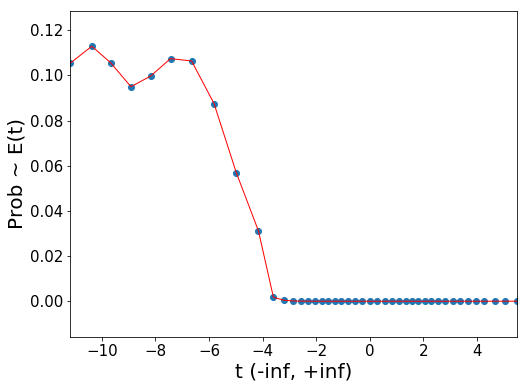

In [5]:
# Plot Prob(t) vs t
if (num_samples > 0):
    plt.figure(figsize=[8,6])
    x = results.prob_t_vs_t[0,:]
    y = results.prob_t_vs_t[1,:]
    plt.scatter(x, y)
    plt.plot(x, y, color='red', linewidth=1)
    #plt.semilogy(x, y, color='red', linewidth=1)
    plt.xlim(x.min()+10, x.max()-10)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.xlabel('t (-inf, +inf)', size=20)
    plt.ylabel('Prob ~ E(t)', size=20)

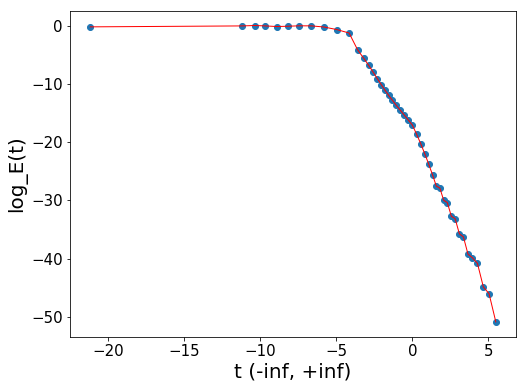

In [6]:
# Plot log_E(t) vs t
if (num_samples > 0):
    plt.figure(figsize=[8,6])
    x = results.prob_t_vs_t[0,:]
    y = results.prob_t_vs_t[2,:]
    plt.scatter(x, y)
    plt.plot(x, y, color='red', linewidth=1)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.xlabel('t (-inf, +inf)', size=20)
    plt.ylabel('log_E(t)', size=20)

In [7]:
# Compute true density
xs = results.bin_centers
Q_true = np.zeros(G)
for i, x in enumerate(xs):
    Q_true[i] = eval(defaults['pdf_py'])
Q_true /= results.h*sum(Q_true)

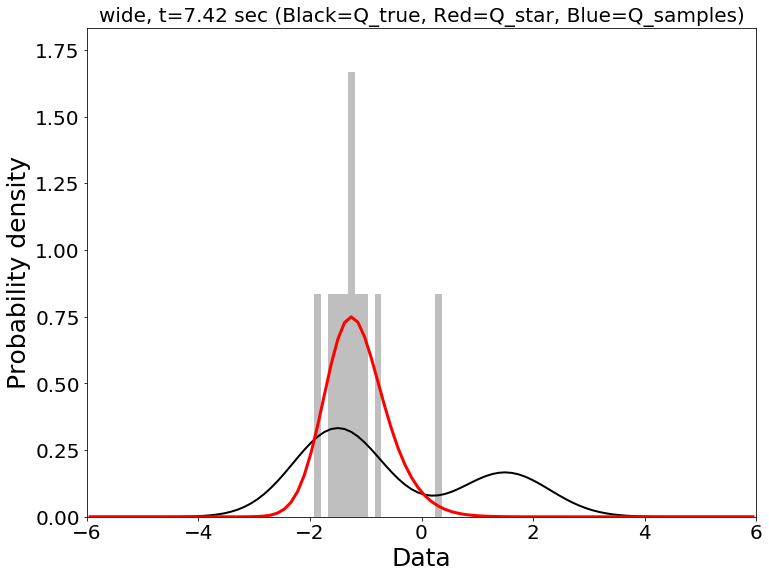

In [8]:
plt.figure(figsize=[12,9])
xs = results.bin_centers

# plot histogram density
left_bin_edges = results.bin_edges[:-1]
plt.bar(xs, results.R, width=results.h, color='gray', linewidth=0, zorder=0, alpha=0.5) # Here I used xs!

# Plot the MCMC samples from S
if (num_samples > 0):
    plt.plot(xs, results.Q_samples, color='blue', linewidth=5, zorder=1, alpha=0.0)

# Plot DEFT density estimate
plt.plot(xs, results.Q_star, color='red', linewidth=3, zorder=3, alpha=1.0)

# Plot the true density
plt.plot(xs, Q_true, color='black', linewidth=2, zorder=2, alpha=1.0)

# Tidy up the plot
plt.ylim(0, 1.1*max(max(results.R),max(results.Q_star)))
plt.xlim(bbox)
plt.yticks(size=20)
plt.xticks(size=20)
plt.ylabel('Probability density', size=25)
plt.xlabel('Data', size=25)
t = results.deft_1d_compute_time
plt.title('%s, t=%1.2f sec %s'%(data_type, t, '(Black=Q_true, Red=Q_star, Blue=Q_samples)'), \
          fontsize=20)